<a href="https://colab.research.google.com/github/luisd105/ScoutingCenterBack/blob/main/scouting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import sys

# URL do jogador
url = "https://fbref.com/en/players/8f0435c7/Antonio-Silva"

try:
    tables = pd.read_html(url)
except Exception as e:
    sys.exit(f"Erro ao aceder à URL: {e}")

# --- Encontra a tabela correta ---
scouting_report_df = None
for table in tables:
    if 'Statistic' in table.columns and 'Percentile' in table.columns:
        scouting_report_df = table
        break

if scouting_report_df is not None:
    # --- Calcula e armazena os dados internamente ---

    metricas_a_usar = [
        'Tackles',
        'Interceptions',
        'Aerials Won',
        'Progressive Passes',
        'Pass Completion %'
    ]

    if isinstance(scouting_report_df.columns, pd.MultiIndex):
        scouting_report_df.columns = scouting_report_df.columns.droplevel(0)

    stats_percentis = dict(zip(scouting_report_df['Statistic'], scouting_report_df['Percentile']))

    stats_escaladas_10 = {}
    for metrica in metricas_a_usar:
        if metrica in stats_percentis:
            percentil = pd.to_numeric(stats_percentis[metrica], errors='coerce')
            stats_escaladas_10[metrica] = (percentil / 99.0) * 10 if not pd.isna(percentil) else 0
        else:
            stats_escaladas_10[metrica] = 0

    # Percentagens definidas
    pesos_ajustados = {
        'Tackles': 25,
        'Interceptions': 25,
        'Pass Completion %': 20,
        'Progressive Passes': 20,
        'Aerials Won': 10
    }

    nota_final = 0
    soma_pesos = sum(pesos_ajustados.values())

    for metrica, nota_10 in stats_escaladas_10.items():
        if metrica in pesos_ajustados:
            nota_final += nota_10 * (pesos_ajustados[metrica] / 100.0)

    # --- Imprime o resultado final formatado ---

    print("--- Notas Individuais (0-10) ---")
    for metrica, nota in stats_escaladas_10.items():
        print(f"{metrica}: {nota:.2f}")

    print("\n--- Nota Final Ponderada ---")
    print(f"{nota_final:.2f}")

else:
    sys.exit("Erro: Não foi possível encontrar a tabela 'Scouting Report'.")

--- Notas Individuais (0-10) ---
Tackles: 6.67
Interceptions: 3.13
Aerials Won: 6.46
Progressive Passes: 8.28
Pass Completion %: 7.68

--- Nota Final Ponderada ---
6.29


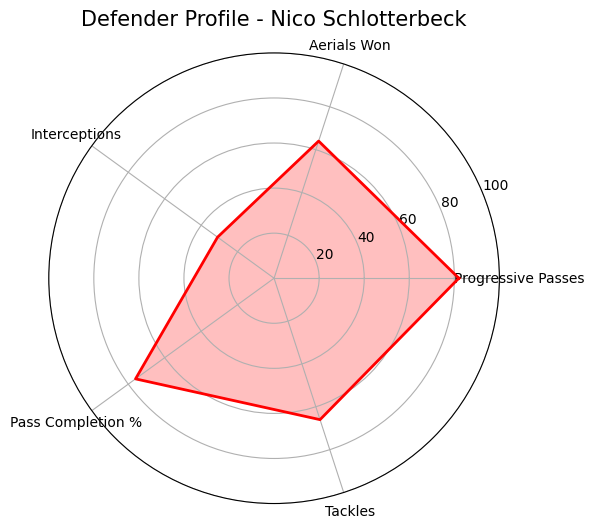

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#  Read the tables from FBref page
url = "https://fbref.com/en/players/8f0435c7/Antonio-Silva"
tables = pd.read_html(url)


df_first_table = tables[0]
df_first_table.drop(df_first_table.columns[1], axis=1, inplace=True)

# Hardcoded dictionary for position-specific stats
position_metrics = {
    'Defender': [
        'Progressive Passes',
        'Aerials Won',
        'Interceptions',
        'Pass Completion %',
        'Tackles'
    ]
}


position = 'Defender'
desired_metrics = position_metrics[position]

# Convert DataFrame to dictionary for easier lookup
table_dict = dict(zip(df_first_table[df_first_table.columns[0]], df_first_table[df_first_table.columns[1]]))


values = [float(table_dict[metric]) for metric in desired_metrics]

# Radar plot
labels = desired_metrics
num_vars = len(labels)


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values += values[:1]  # repeat first value to close the radar chart
angles += angles[:1]


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='red', linewidth=2)
ax.fill(angles, values, color='red', alpha=0.25)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20', '40', '60', '80', '100'])
ax.set_title(f'{position} Profile - António Silva', size=15, pad=20)

plt.tight_layout()
plt.show()